# Lab 4

## Connect to DB

In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config2.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [31]:
conn = psycopg2.connect(host = host,
                        user = user,
                        password = pwd,
                        dbname = db)


# Q1

In [20]:
sql = ''' select * from student '''
df = pandas.read_sql_query(sql, conn)
df[:]

/tmp/ipykernel_11234/633470345.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


# Q2

In [21]:
sql = ''' select professor.p_name, course.c_name from professor inner join course on professor.p_email = course.p_email '''
df = pandas.read_sql_query(sql, conn)
df[:]

/tmp/ipykernel_11234/3867090475.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


# Q3

/tmp/ipykernel_11234/2696934729.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


<Axes: xlabel='c_number'>

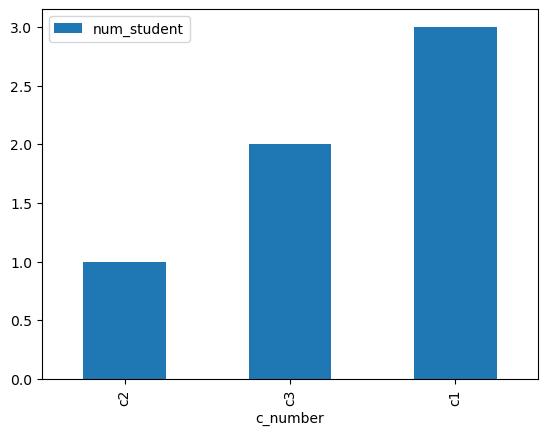

In [22]:
sql = ''' Select c_number, count(s_email) as num_student from enroll group by c_number'''
df = pandas.read_sql_query(sql, conn)
df.plot.bar(y='num_student', x='c_number')

# Q4

/tmp/ipykernel_11234/1239326970.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


<Axes: xlabel='p_name'>

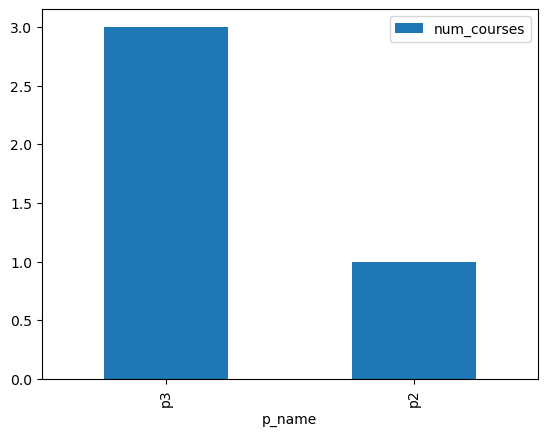

In [23]:
sql = ''' Select professor.p_name, count(c_name) as num_courses from professor inner join course on professor.p_email = course.p_email group by p_name'''
df = pandas.read_sql_query(sql, conn)
df.plot.bar(x='p_name', y='num_courses' )

# Q5

In [70]:
cur = conn.cursor()

In [53]:
sql = ''' insert into professor(p_email,p_name,office) 
values('p4@jmu.edu','p4','o4') '''

In [54]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(p4@jmu.edu) already exists.


In [ ]:
conn.commit()

In [69]:
conn.rollback()

In [ ]:
sql = ''' insert into cours(c_number,c_name,room,p_email) 
values('c5','linkedin','r2','p4@jmu.edu') '''

In [ ]:
cur.execute(sql)

In [ ]:
conn.commit()

In [61]:
df = pandas.read_sql_query('select * from professor', conn)
df[:]

/tmp/ipykernel_11234/385041841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from professor', conn)


,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [62]:
df = pandas.read_sql_query('select * from course', conn)
df[:]

/tmp/ipykernel_11234/4028193866.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from course', conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


# Q6

In [71]:
sql = ''' update course
set p_email = 'p4@jmu.edu'
where p_email = 'p2@jmu.edu'
'''

In [72]:
cur.execute(sql)

In [73]:
conn.commit()

In [80]:
sql = ''' delete from professor
where p_email = 'p2@jmu.edu' '''

In [81]:
cur.execute(sql)

In [82]:
conn.commit()

In [77]:
df = pandas.read_sql_query('select * from course', conn)
df[:]

/tmp/ipykernel_11234/4028193866.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from course', conn)


,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [83]:
df = pandas.read_sql_query('select * from professor', conn)
df[:]

/tmp/ipykernel_11234/385041841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from professor', conn)


,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4
